### Import module


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


### Plot Params

In [3]:
plt.style.use('seaborn-v0_8-whitegrid') 
params = {
    'figure.figsize': (8, 6),
    'axes.labelsize': 12,
    'figure.titlesize': 16,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'lines.linewidth': 1.5,
    'lines.markersize': 4,
    'legend.fontsize': 11,
    'legend.framealpha': 0.8,
    'legend.loc': 'best',
    'figure.dpi': 120,
    'savefig.dpi': 150,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.5,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'figure.constrained_layout.use': True,
    'text.usetex': True, 
}
plt.rcParams.update(params)

### Input processing

In [4]:
project_name = "RC_freq"

data = np.genfromtxt(f'../input/{project_name}.csv', delimiter=';', skip_header=1)
f_data , Vin_data, Vout_data , Vfs_data, t_data, tfs_data = data.T
A_data = Vout_data / Vin_data
phi_data = 2*np.pi*f_data*np.array(tfs_data)*1e-6/(np.pi/2.) # norm to 1
phi_fs = 2*np.pi*f_data*np.array(tfs_data)*1e-6/(np.pi/2.)
for x, y in tuple(zip(f_data, A_data)):
    print(f"f = {x:.2f} Hz, A = {y:.2f}")

f = 500.00 Hz, A = 1.01
f = 1000.00 Hz, A = 0.97
f = 1500.00 Hz, A = 0.95
f = 2000.00 Hz, A = 0.93
f = 2500.00 Hz, A = 0.90
f = 3000.00 Hz, A = 0.87
f = 3500.00 Hz, A = 0.83
f = 4000.00 Hz, A = 0.79
f = 4500.00 Hz, A = 0.75
f = 5000.00 Hz, A = 0.72
f = 5500.00 Hz, A = 0.69
f = 6000.00 Hz, A = 0.66
f = 6500.00 Hz, A = 0.63
f = 7000.00 Hz, A = 0.61
f = 7500.00 Hz, A = 0.57
f = 8000.00 Hz, A = 0.55
f = 27000.00 Hz, A = 0.20
f = 40000.00 Hz, A = 0.14
f = 70000.00 Hz, A = 0.08
f = 97000.00 Hz, A = 0.06
f = 170000.00 Hz, A = 0.03
f = 270000.00 Hz, A = 0.02
f = 430000.00 Hz, A = 0.01
f = 680000.00 Hz, A = 0.01
f = 1000000.00 Hz, A = 0.01
f = 1700000.00 Hz, A = 0.01
f = 2700000.00 Hz, A = 0.01


### Errors


In [5]:
Vin_errL = Vfs_data[0]/10*0.41
Vout_errL = Vfs_data/10*0.41
phi_errL = phi_fs/10*0.41*np.sqrt(2)
A_err= A_data*np.sqrt((Vout_errL/Vout_data)**2 + (Vin_errL/Vin_data)**2+2*(0.03*0.41)**2)
A_err[Vfs_data > 0.9] = A_data[Vfs_data > 0.9] * np.sqrt((Vout_errL[Vfs_data > 0.9] / Vout_data[Vfs_data > 0.9])**2 + (Vin_errL / Vin_data[Vfs_data > 0.9])**2)
print(A_err)

[0.00830695 0.00809701 0.00805118 0.00796036 0.00782636 0.00775804
 0.00760647 0.00745917 0.00733652 0.00721737 0.0071019  0.00702706
 0.00691813 0.00684782 0.00679436 0.00672791 0.00387671 0.00281124
 0.00160099 0.00123326 0.00069714 0.00041833 0.00029243 0.00023106
 0.0001757  0.000165   0.00015237]


In [6]:
# Local fit interval
f_min = 3000
f_max = 9000

### Plot Raw Data


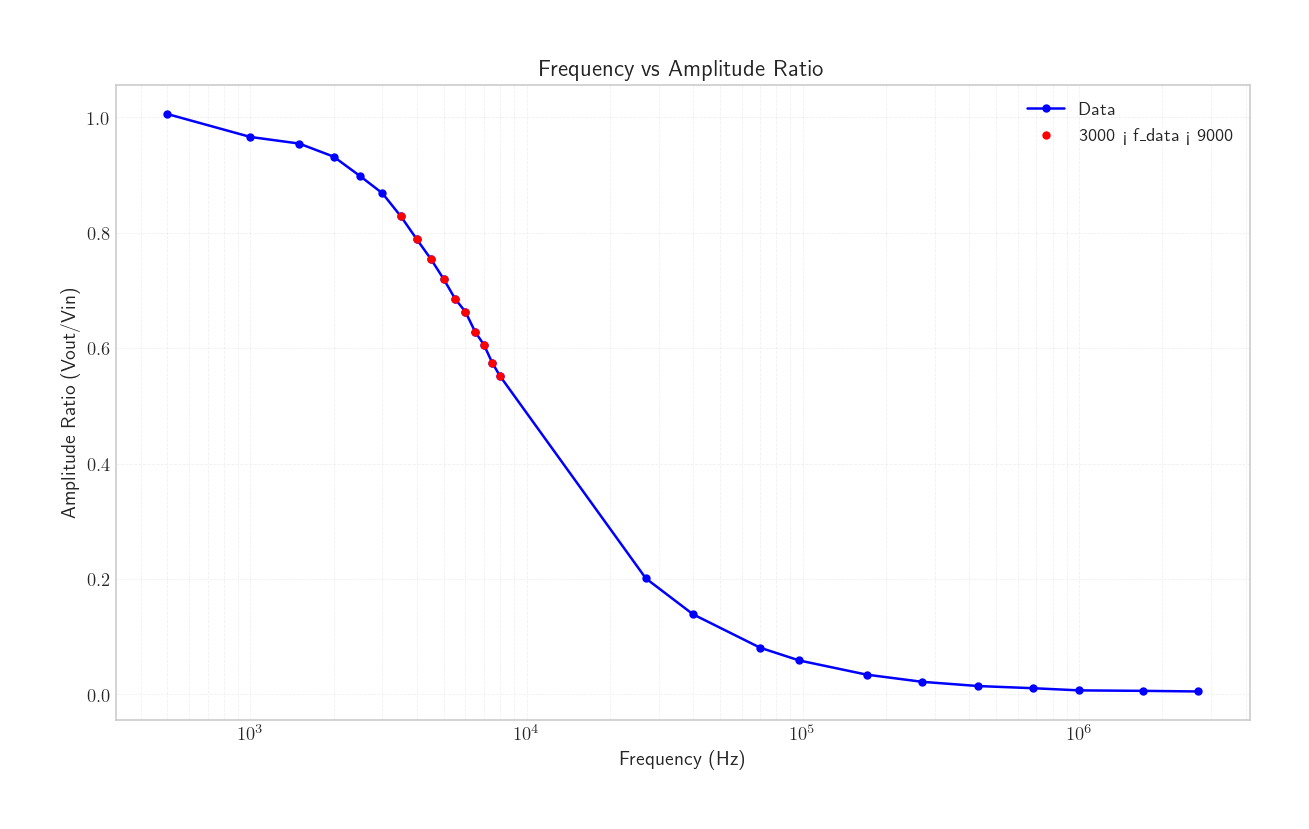

In [7]:
# Plot the data with red markers for points where f_min < f_data < f_max
plt.figure(figsize=(10, 6))
plt.plot(f_data, A_data, marker='o', linestyle='-', color='b', label='Data')
plt.scatter(f_data[(f_data > f_min) & (f_data < f_max)], A_data[(f_data > f_min) & (f_data < f_max)], color='r', label='3000 < f_data < 9000', zorder=5)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Ratio (Vout/Vin)')
plt.title('Frequency vs Amplitude Ratio')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.savefig(f'../output/{project_name}_rawdata.png')
plt.show()



### Local fit

In [8]:
# Define the model function for the fit
def fit_lin(x,m,q):
    fitval = m * x + q
    return fitval


In [9]:
# Define the data for the fit
# Select the data points for the fit (f_min < f_data < f_max)
x = f_data[(f_data > f_min) & (f_data < f_max)]
y = A_data[(f_data > f_min) & (f_data < f_max)]
z = phi_data[(f_data > f_min) & (f_data < f_max)]
y_err = A_err[(f_data > f_min) & (f_data < f_max)]
z_err = phi_errL[(f_data > f_min) & (f_data < f_max)]
N = len(x)

# Fit the data using curve_fit
popt_A, pcov_A = curve_fit(fit_lin, x, y, sigma=y_err,p0=[-0.1, 1], method='lm', absolute_sigma=True)
popt_phi, pcov_phi = curve_fit(fit_lin, x, z, sigma=z_err,p0=[0.1, 0], method='lm', absolute_sigma=True)


In [10]:
# build residuals data
residuA = y - fit_lin(x, *popt_A)
residuphi = z - fit_lin(x, *popt_phi)

# variables error and chi2
perr_A = np.sqrt(np.diag(pcov_A))
chisq_A = np.sum((residuA / y_err)**2)
perr_phi = np.sqrt(np.diag(pcov_phi))
chisq_phi = np.sum((residuphi / z_err)**2)
df = N - 2

# breakpoint frequency
ft_A = (1 / np.sqrt(2) - popt_A[1]) / popt_A[0]
ft_phi = (0.5 - popt_phi[1]) / popt_phi[0]
corr = -1 * np.mean(x) / np.sqrt(np.var(x) + np.mean(x)**2)

err_ft_A = np.sqrt((ft_A / popt_A[0])**2 * perr_A[0]**2 + (1 / popt_A[0])**2 * perr_A[1]**2 + 2 * ft_A / popt_A[0]**2 * pcov_A[0, 1])
err_ft_phi = np.sqrt((ft_phi / popt_phi[0])**2 * perr_phi[0]**2 + (1 / popt_phi[0])**2 * perr_phi[1]**2 + 2 * ft_phi / popt_phi[0]**2 * pcov_phi[0, 1])

ft_stima = []
ft_stima.append(['A,loc', ft_A, err_ft_A])
ft_stima.append(['$\phi$,loc', ft_phi, err_ft_phi])

<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
C:\Users\bagno\AppData\Local\Temp\ipykernel_14384\3409266044.py:22: SyntaxWarning: invalid escape sequence '\p'
  ft_stima.append(['$\phi$,loc', ft_phi, err_ft_phi])


In [11]:
# Extract and print best fit parameters and errors

print("\n ============== BEST FIT Lin Loc - SciPy ====================")
print("\n ================== From A ========================")
print( r' slope m = {a:.3e} +/- {b:.1e} s'.format(a=popt_A[0], b=perr_A[0]))
print( r' intercept q = {c:.3f} +/- {d:.3f} '.format(c=popt_A[1],d=perr_A[1]))
print(r' chisq/ndf = {e:.2f}'.format(e=chisq_A/df))
print(r' breakpoint frequency = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_A, d=err_ft_A))
print("\n ================== from phi ========================")
print( r' slope m = {a:.3e} +/- {b:.1e} s'.format(a=popt_phi[0], b=perr_phi[0]))
print( r' intercept q = {c:.3f} +/- {d:.3f} '.format(c=popt_phi[1],d=perr_phi[1]))
print(r' chisq/ndf = {e:.2f}'.format(e=chisq_phi/df))
print(r' breakpoint frequency = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_phi, d=err_ft_phi))
print("=============================================================\n")


 ============== BEST FIT Lin Loc - SciPy ====================

 ================== From A ========================
 slope m = -6.067e-05 +/- 1.6e-06 s
 intercept q = 1.029 +/- 0.009 
 chisq/ndf = 0.92
 breakpoint frequency = 5303 +/- 40 Hz

 ================== from phi ========================
 slope m = 4.000e-05 +/- 1.1e-06 s
 intercept q = 0.000 +/- 0.005 
 chisq/ndf = 0.00
 breakpoint frequency = 12500 +/- 270 Hz



### Local Fit Plot

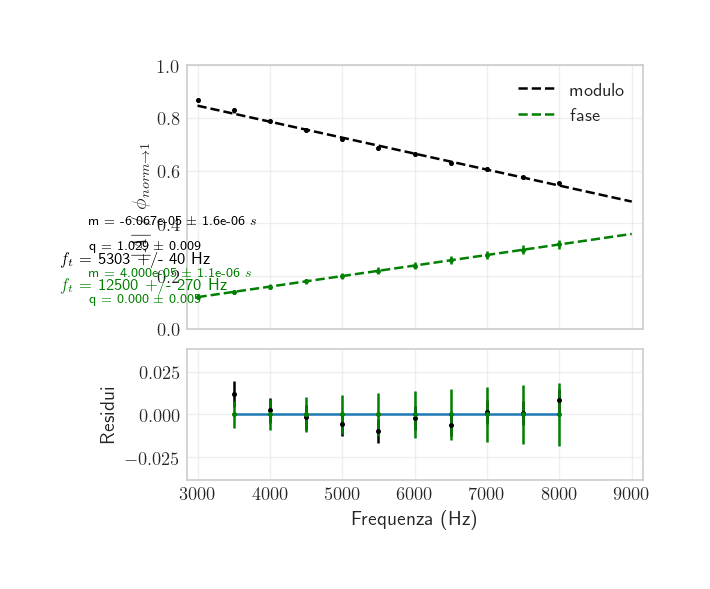

In [12]:
x_fit = np.linspace(f_min, f_max, 1000)
fig, ax = plt.subplots(2, 1, figsize=(5, 4), sharex=True, constrained_layout=True, height_ratios=[2, 1])
ax[0].plot(x_fit, fit_lin(x_fit, *popt_A), label='modulo', linestyle='--', color='black')
ax[0].plot(x_fit, fit_lin(x_fit, *popt_phi), label='fase', linestyle='dashed', color='green')
ax[0].errorbar(f_data, A_data, yerr=A_err, fmt='o', ms=2, color='black')  # , label=r'data'
ax[0].errorbar(f_data, phi_data, yerr=phi_errL, fmt='o', ms=2, color='green')  # , label=r'data'
ax[0].set_xlim(f_min - 300 / 2, f_max + 300 / 2)
ax[0].set_ylim(0, 1)
ax[0].legend(loc='upper right')
ax[0].set_ylabel(r'$\left|A\right|$ / $\phi_{norm \to 1}$')
ax[0].text(1500, 0.4, r'm = {a:.3e} $\pm$ {b:.1e} $s$'.format(a=popt_A[0], b=perr_A[0]), size=8, color='black')
ax[0].text(1500, 0.3, r'q = {c:.3f} $\pm$ {d:.3f}'.format(c=popt_A[1], d=perr_A[1]), size=8, color='black')
ax[0].text(1500, 0.2, r'm = {a:.3e} $\pm$ {b:.1e} $s$'.format(a=popt_phi[0], b=perr_phi[0]), size=8, color='green')
ax[0].text(1500, 0.1, r'q = {c:.3f} $\pm$ {d:.3f}'.format(c=popt_phi[1], d=perr_phi[1]), size=8, color='green')

ax[0].text(1100, 0.15, r'$f_t$ = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_phi, d=err_ft_phi), size=10, color='green')
ax[0].text(1100, 0.25, r'$f_t$ = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_A, d=err_ft_A), size=10, color='black')

ax[1].errorbar(x, residuA, yerr=y_err, fmt='o', label=r'modulo', ms=2, color='black')
ax[1].errorbar(x, residuphi, yerr=z_err, fmt='o', label=r'fase ', ms=2, color='green')
R_ylim = np.std(residuA) * 5 + np.max(y_err)
ax[1].set_ylim([-1 * R_ylim, R_ylim])
ax[1].set_ylabel(r'Residui')
ax[1].set_xlabel(r'Frequenza (Hz)', loc='center')
ax[1].plot(x, np.zeros(N))

plt.savefig(f'../output/{project_name}_localfit.png')
